In [38]:
%matplotlib notebook
from scipy.ndimage import sobel, laplace
import numpy as np
import pickle
import matplotlib.pyplot as plt

def rescale_values(image,max_val,min_val):
    '''
    image - numpy array
    max_val/min_val - float
    '''
    return (image-image.min())/(image.max()-image.min())*(max_val-min_val)+min_val

SEED=1234
np.random.seed(SEED)
# torch.manual_seed(SEED)

In [27]:
# Scale matrix to sum to 1
def sum_to_1(mat):
    return mat / np.sum(mat)

def rand_baseline(data: np.array):
    rands = np.random.uniform(low=-1.0, high=1.0, size=(data.shape))
    return sum_to_1(rands)

def x_baseline(data: np.array):
    rgb_weights = [0.2989, 0.5870, 0.1140]
    greyscale = np.dot(data[...,:3], rgb_weights)
    return sum_to_1(greyscale)

In [ ]:
# # Confounder Data
# with open('confounder_train128.pkl', 'rb') as f:
#     confounder_train = pickle.load(f)
#     confounder_train = [[rescale_values(i[0],1,0).transpose(2,0,1),i[1]] for i in confounder_train]

# with open('confounder_val128.pkl', 'rb') as f:
#     confounder_val = pickle.load(f)
#     confounder_val = [[rescale_values(i[0],1,0).transpose(2,0,1),i[1]] for i in confounder_val]

# with open('confounder_test128.pkl', 'rb') as f:
#     confounder_test = pickle.load(f)
#     confounder_test = [[rescale_values(i[0],1,0).transpose(2,0,1),i[1]] for i in confounder_test]

    
# # Suppressor Data
# with open('suppressor_train128.pkl', 'rb') as f:
#     supressor_train = pickle.load(f)
#     supressor_train = [[rescale_values(i[0],1,0).transpose(2,0,1),i[1]] for i in supressor_train]

# with open('suppressor_validation128.pkl', 'rb') as f:
#     supressor_val = pickle.load(f)
#     supressor_val = [[rescale_values(i[0],1,0).transpose(2,0,1),i[1]] for i in supressor_val]

# with open('suppressor_test128.pkl', 'rb') as f:
#     supressor_test = pickle.load(f)
#     supressor_test = [[rescale_values(i[0],1,0).transpose(2,0,1),i[1]] for i in supressor_test]


# # No Watermark Data
# with open('no_mark_train128.pkl', 'rb') as f:
#     no_mark_train = pickle.load(f)
#     no_mark_train = [[rescale_values(i[0],1,0).transpose(2,0,1),i[1]] for i in no_mark_train]

# with open('no_mark_validation128.pkl', 'rb') as f:
#     no_mark_val = pickle.load(f)
#     no_mark_val = [[rescale_values(i[0],1,0).transpose(2,0,1),i[1]] for i in no_mark_val]

# with open('no_mark_test128.pkl', 'rb') as f:
#     no_mark_test = pickle.load(f)
#     no_mark_test = [[rescale_values(i[0],1,0).transpose(2,0,1),i[1]] for i in no_mark_test]

In [12]:
with open('mark_all128.pkl', 'rb') as f:
    watermark_dataset = pickle.load(f)
    watermark_dataset = [[rescale_values(i[0],1,0).transpose(2,0,1),i[1]] for i in watermark_dataset]

with open('no_mark_test128.pkl', 'rb') as f:
    no_watermark_dataset = pickle.load(f)
    no_watermark_dataset = [[rescale_values(i[0],1,0).transpose(2,0,1),i[1]] for i in no_watermark_dataset]

<IPython.core.display.Javascript object>


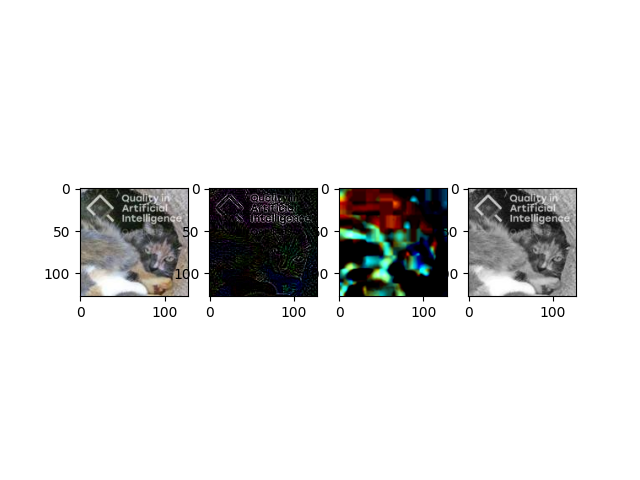

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [97]:
sample = watermark_dataset[0][0].transpose(1,2,0)

fig, axs = plt.subplots(1,4)


axs[0].imshow(sample)
axs[1].imshow(laplace(sample))
axs[2].imshow(sobel(sample))
axs[3].imshow(x_baseline(sample),cmap='gray')
plt.show()

In [41]:
img_r = sample[:,:,0]
img_g = sample[:,:,1]
img_b = sample[:,:,2]

(128, 128)


<IPython.core.display.Javascript object>


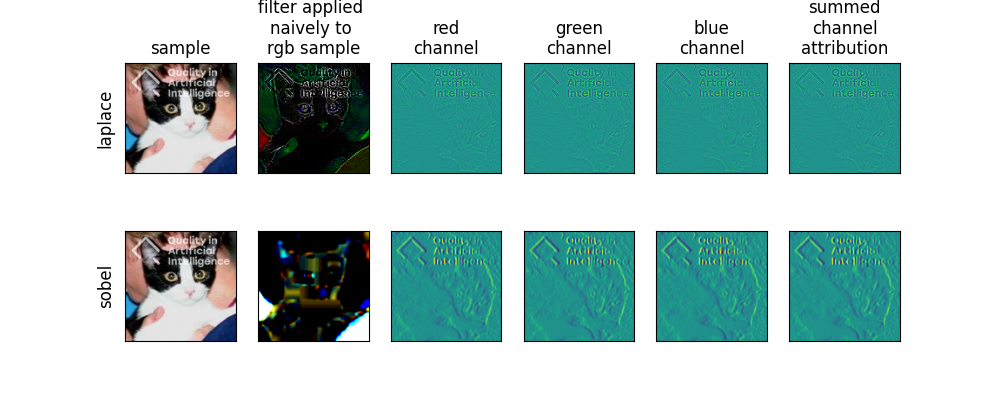

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [88]:
sample = watermark_dataset[1][0].transpose(1,2,0)

font_size = 12

fig, axs = plt.subplots(2,6, figsize=(10,4))

axs[0,0].imshow(sample)
axs[0,1].imshow(laplace(sample))
axs[0,2].imshow(laplace(img_r))
axs[0,3].imshow(laplace(img_g))
axs[0,4].imshow(laplace(img_b))
axs[0,5].imshow(laplace(img_r) + laplace(img_g) + laplace(img_b))


axs[1,0].imshow(sample)
axs[1,1].imshow(sobel(sample))
axs[1,2].imshow(sobel(img_r))
axs[1,3].imshow(sobel(img_g))
axs[1,4].imshow(sobel(img_b))
axs[1,5].imshow(sobel(img_r) + sobel(img_g) + sobel(img_b))

axs[0,0].set_ylabel('laplace', fontsize=font_size)
axs[1,0].set_ylabel('sobel', fontsize=font_size)

axs[0,0].set_title('sample', fontsize=font_size)
axs[0,1].set_title('filter applied \nnaively to \nrgb sample', fontsize=font_size)

axs[0,2].set_title('red\nchannel', fontsize=font_size)
axs[0,3].set_title('green\nchannel', fontsize=font_size)
axs[0,4].set_title('blue\nchannel', fontsize=font_size)

axs[0,5].set_title('summed\nchannel\nattribution', fontsize=font_size)

for i in range(2):
    for j in range(6):
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])

plt.show()

<IPython.core.display.Javascript object>


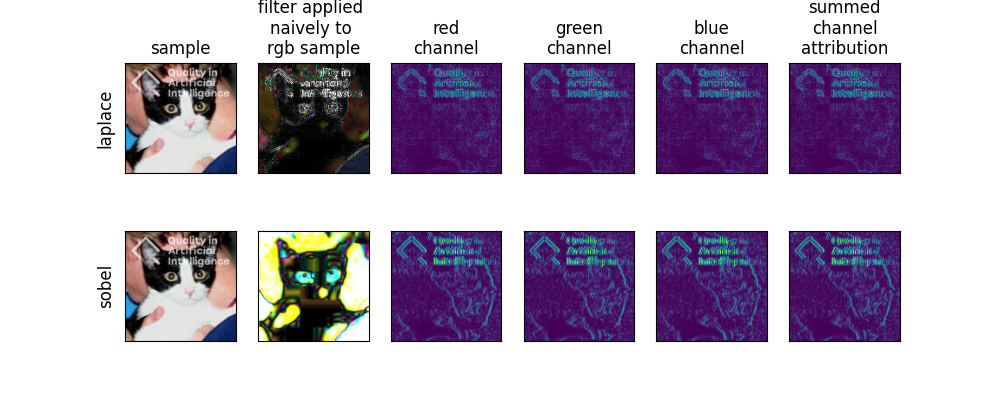

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [89]:
sample = watermark_dataset[1][0].transpose(1,2,0)

fig, axs = plt.subplots(2,6,figsize=(10,4))

axs[0,0].imshow(sample)
axs[0,1].imshow(abs(laplace(sample)))
axs[0,2].imshow(abs(laplace(img_r)))
axs[0,3].imshow(abs(laplace(img_g)))
axs[0,4].imshow(abs(laplace(img_r)))
axs[0,5].imshow(abs(laplace(img_r) + laplace(img_g) + laplace(img_b)))

axs[1,0].imshow(sample)
axs[1,1].imshow(abs(sobel(sample)))
axs[1,2].imshow(abs(sobel(img_r)))
axs[1,3].imshow(abs(sobel(img_g)))
axs[1,4].imshow(abs(sobel(img_b)))
axs[1,5].imshow(abs(sobel(img_r) + sobel(img_g) + sobel(img_b)))

axs[0,0].set_ylabel('laplace', fontsize=font_size)
axs[1,0].set_ylabel('sobel', fontsize=font_size)

axs[0,0].set_title('sample', fontsize=font_size)
axs[0,1].set_title('filter applied \nnaively to \nrgb sample', fontsize=font_size)

axs[0,2].set_title('red\nchannel', fontsize=font_size)
axs[0,3].set_title('green\nchannel', fontsize=font_size)
axs[0,4].set_title('blue\nchannel', fontsize=font_size)

axs[0,5].set_title('summed\nchannel\nattribution', fontsize=font_size)

for i in range(2):
    for j in range(6):
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])

plt.show()

<IPython.core.display.Javascript object>


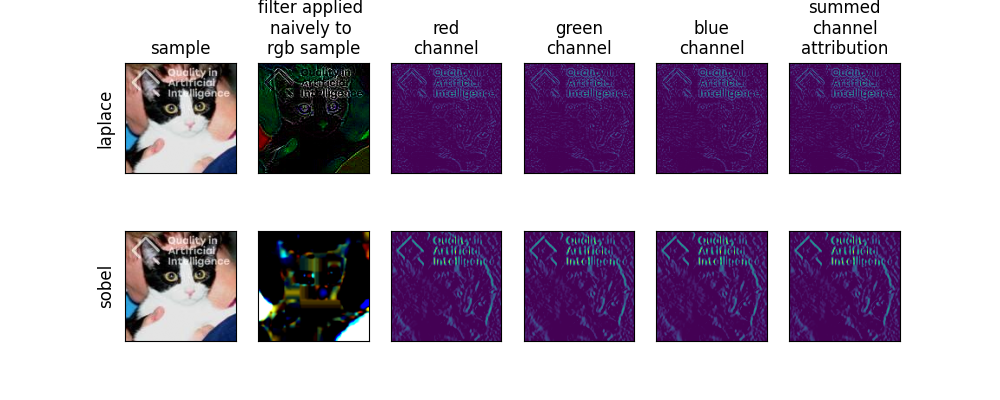

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [90]:
laplace_image_2 = laplace(img_r)*0.2989 + 0.587*laplace(img_g) + 0.114*laplace(img_b) 
sobel_image_2 = sobel(img_r)*0.2989 + 0.587*sobel(img_g) + 0.114*sobel(img_b) 

sample = watermark_dataset[1][0].transpose(1,2,0)

fig, axs = plt.subplots(2,6, figsize=(10,4))

axs[0,0].imshow(sample)
axs[0,1].imshow(np.clip(laplace(sample),0,np.inf))
axs[0,2].imshow(np.clip(laplace(img_r),0,np.inf))
axs[0,3].imshow(np.clip(laplace(img_g),0,np.inf))
axs[0,4].imshow(np.clip(laplace(img_b),0,np.inf))
axs[0,5].imshow(np.clip(laplace(img_r) + laplace(img_g) + laplace(img_b),0,np.inf))


axs[1,0].imshow(sample)
axs[1,1].imshow(np.clip(sobel(sample),0,np.inf))
axs[1,2].imshow(np.clip(sobel(img_r),0,np.inf))
axs[1,3].imshow(np.clip(sobel(img_g),0,np.inf))
axs[1,4].imshow(np.clip(sobel(img_b),0,np.inf))
axs[1,5].imshow(np.clip(sobel(img_r) + sobel(img_g) + sobel(img_b),0,np.inf))

axs[0,0].set_ylabel('laplace', fontsize=font_size)
axs[1,0].set_ylabel('sobel', fontsize=font_size)

axs[0,0].set_title('sample', fontsize=font_size)
axs[0,1].set_title('filter applied \nnaively to \nrgb sample', fontsize=font_size)

axs[0,2].set_title('red\nchannel', fontsize=font_size)
axs[0,3].set_title('green\nchannel', fontsize=font_size)
axs[0,4].set_title('blue\nchannel', fontsize=font_size)

axs[0,5].set_title('summed\nchannel\nattribution', fontsize=font_size)

for i in range(2):
    for j in range(6):
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])


plt.show()

<IPython.core.display.Javascript object>


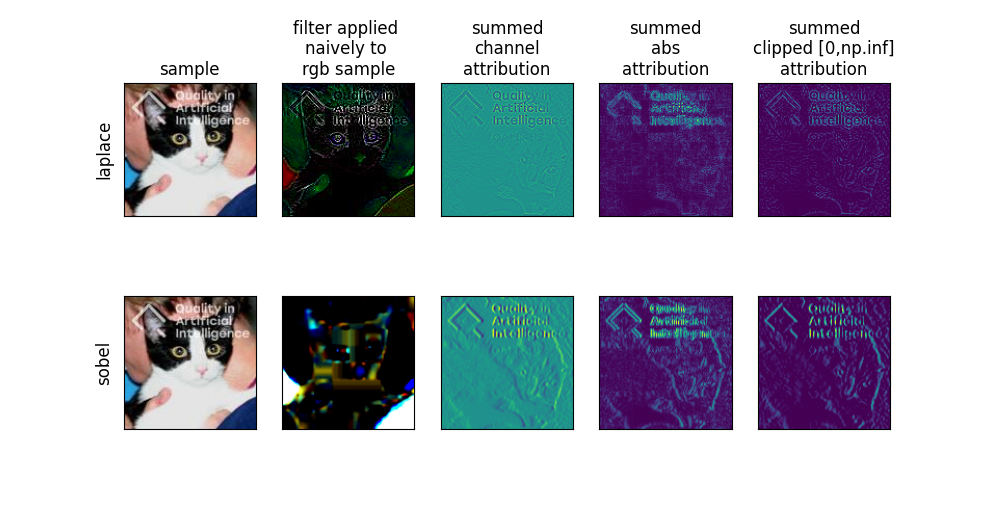

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [93]:
laplace_image_2 = laplace(img_r)*0.2989 + 0.587*laplace(img_g) + 0.114*laplace(img_b) 
sobel_image_2 = sobel(img_r)*0.2989 + 0.587*sobel(img_g) + 0.114*sobel(img_b) 

sample = watermark_dataset[1][0].transpose(1,2,0)

fig, axs = plt.subplots(2,5, figsize=(10,4))

axs[0,0].imshow(sample)
axs[0,1].imshow(laplace(sample))
axs[0,2].imshow(laplace(img_r) + laplace(img_g) + laplace(img_b))
axs[0,3].imshow(abs(laplace(img_r)) + abs(laplace(img_g)) + abs(laplace(img_b)))
axs[0,4].imshow(np.clip(laplace(img_r) + laplace(img_g) + laplace(img_b),0,np.inf))


axs[1,0].imshow(sample)
axs[1,1].imshow(sobel(sample))
axs[1,2].imshow(sobel(img_r) + sobel(img_g) + sobel(img_b))
axs[1,3].imshow(abs(sobel(img_r)) + abs(sobel(img_g)) + abs(sobel(img_b)))
axs[1,4].imshow(np.clip(sobel(img_r) + sobel(img_g) + sobel(img_b),0,np.inf))



axs[0,0].set_ylabel('laplace', fontsize=font_size)
axs[1,0].set_ylabel('sobel', fontsize=font_size)

axs[0,0].set_title('sample', fontsize=font_size)
axs[0,1].set_title('filter applied \nnaively to \nrgb sample', fontsize=font_size)

axs[0,2].set_title('summed\nchannel\nattribution', fontsize=font_size)
axs[0,3].set_title('summed\nabs\nattribution', fontsize=font_size)
axs[0,4].set_title('summed\nclipped [0,np.inf]\nattribution', fontsize=font_size)

# axs[0,5].set_title('summed\nchannel\nattribution', fontsize=font_size)

for i in range(2):
    for j in range(5):
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])


plt.show()